In [1]:
import sys

sys.path.append('../')

from classes import *

In [2]:
bgs = BGS('BGS_ANY_full.provabgs.lite.hdf5', is_bgs_bright=True)
emcee_file = FileEmcee(z_dependence=True, bin_test=True, info_file='0.01_0.2')
emcee_run = EmceeRun(emcee_file)

In [3]:
emcee_run.set_best_params(discard=150)

In [4]:
plotter = Plotter(bgs, emcee_run)

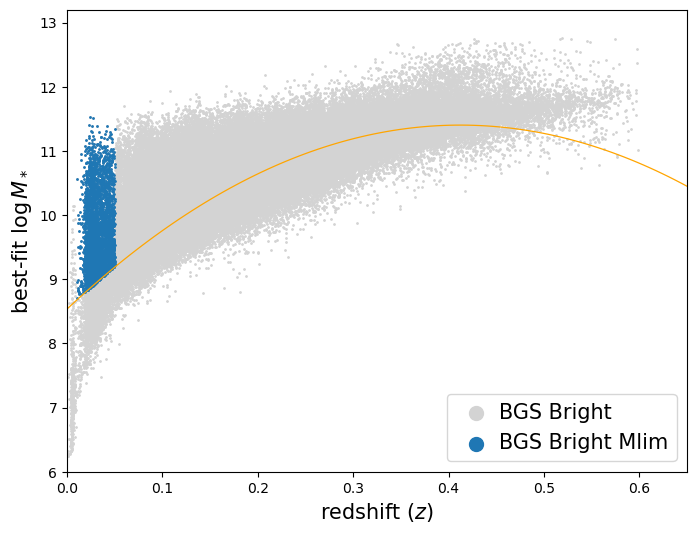

In [5]:
fig, ax = plotter.plot_selected_data(0.01, 0.05)

In [6]:
vmax_hist = VmaxDensity(bgs.file, is_bgs_bright=True)       

In [7]:
h, b, _h, _b = vmax_hist.histogram_norm(0.01, 0.05)

In [8]:
z_smf = ZSchechterModel(bgs, 0.01, 0.05, 0.035)

In [9]:
n = z_smf.normalisation(emcee_run.get_best_params())

In [10]:
n/7

0.00309539426634074

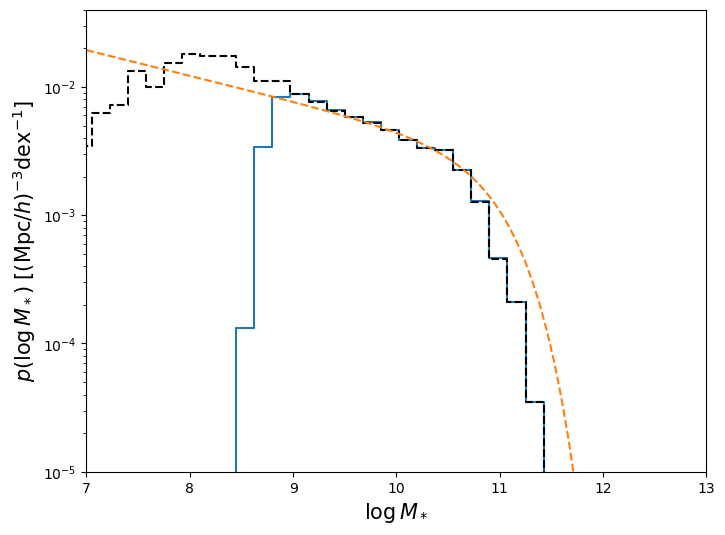

In [11]:
x_lin = np.linspace(7, 14, 100)

plotter.plot_vmax_hist(h, b, _h, _b)
# plt.sca(ax)
Plotter.plot_zschechter(x_lin, 0.035, n/7, emcee_run.get_best_params())
plt.show()

In [ ]:

mask = (vmax_hist.z > 0.01) & (vmax_hist.z < 0.05)
_w = vmax_hist.w_spec/vmax_hist.vmax


_h, _b = np.histogram(vmax_hist.x_median[mask], bins=40, range=(6., 13.), weights=_w[mask])

In [ ]:
plt.scatter(vmax_hist.z, vmax_hist.x_median, s=1)
plt.scatter(vmax_hist.z[mask], vmax_hist.x_median[mask], s=1)

In [ ]:
_w[mask]

In [ ]:
vmax_hist.w_spec[mask]/vmax_hist.vmax[mask]

In [ ]:
vmax_hist.x_median.shape, vmax_hist

In [ ]:
plt.step(b[:-1], h, where='pre')
plt.yscale('log')
plt.ylim(1e-5, 4e-2)
plt.xlim(7, 13)

In [ ]:
Plotter(bgs, emcee_run)

In [ ]:

emcee_run = EmceeRun(emcee_file)

In [ ]:
emcee_run.emcee_file

In [ ]:
plotter = Plotter(bgs, emcee_run)

In [ ]:
noz_smf = NoZSchechterModel(bgs, 0.01, 0.05)
z_smf = ZSchechterModel(bgs, 0.01, 0.05, 0.03)

In [ ]:
emcee_run.set_best_params(120)

In [ ]:
noz_smf.posterior(emcee_run.get_best_params())

In [ ]:
z_emcee_file = FileEmcee(z_dependence=True, bin_test=True, info_file='0.01_0.2')
z_emcee_run = EmceeRun(z_emcee_file)

In [ ]:
z_plotter = Plotter(bgs, z_emcee_run)

In [ ]:
z_plotter.plot_emcee_samples()

In [ ]:
z_emcee_run.set_best_params(100)

In [ ]:
z_plotter.plot_emcee_corner()

In [ ]:
z_smf.posterior(z_emcee_run.get_best_params())

In [ ]:
noz_smf.posterior(emcee_run.get_best_params())

In [ ]:
fig, ax = plotter.plot_selected_data(0.13, 0.17)

In [ ]:
smf.mass_completeness_limit(smf.z)

In [ ]:
NoZSchechterModel.phi(smf.x_median, 10.5, -1)

In [ ]:
smf.log_likelihood(10.5, -1)